In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-mail-summarization-dataset/article_highlights.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/daily-mail-summarization-dataset/article_highlights.csv')
df.head()

,url,article,highlights
0,https://www.dailymail.co.uk/tvshowbiz/article-...,Beyoncé showcases her incredible figure in plu...,Beyoncé has shown off her flawless beauty in a...
1,https://www.dailymail.co.uk/tvshowbiz/article-...,Radio 1 listeners in shock as sex noises are p...,BBC Radio 1 listeners were left choking on the...
2,https://www.dailymail.co.uk/tvshowbiz/article-...,"TOWIE's Dan Edgar, 33, and Ella Rae Wise, 23, ...",Dan Edgar and Ella Rae Wise put on a loved-up ...
3,https://www.dailymail.co.uk/tvshowbiz/article-...,Bradley Cooper recalls 'crazy' pitch meeting a...,Bradley Cooper discussed the 'crazy' experienc...
4,https://www.dailymail.co.uk/tvshowbiz/article-...,Margaret Qualley and Beanie Feldstein stun in ...,Margaret Qualley and Beanie Feldstein were dre...


In [4]:
df.columns

Index(['url', 'article', 'highlights'], dtype='object')

In [5]:
# Shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (8176, 3)
Columns: ['url', 'article', 'highlights']


In [6]:
# Check for missing values
df.isnull().sum()

url            0
article       11
highlights     3
dtype: int64

In [7]:
import matplotlib.pyplot as plt

# Add length columns
df['article_len'] = df['article'].apply(lambda x: len(str(x).split()))
df['highlight_len'] = df['highlights'].apply(lambda x: len(str(x).split()))

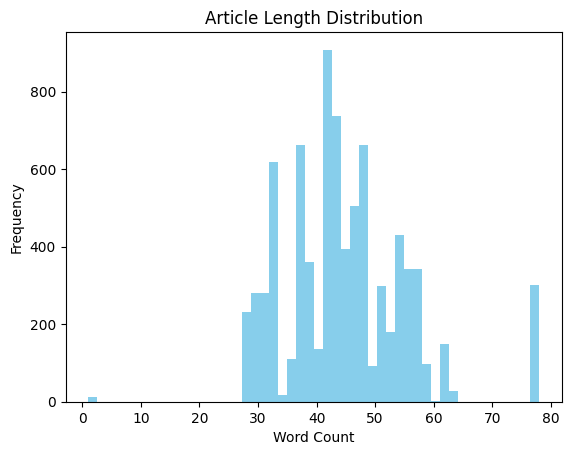

In [8]:
# Histogram of article lengths
plt.hist(df['article_len'], bins=50, color='skyblue')
plt.title('Article Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

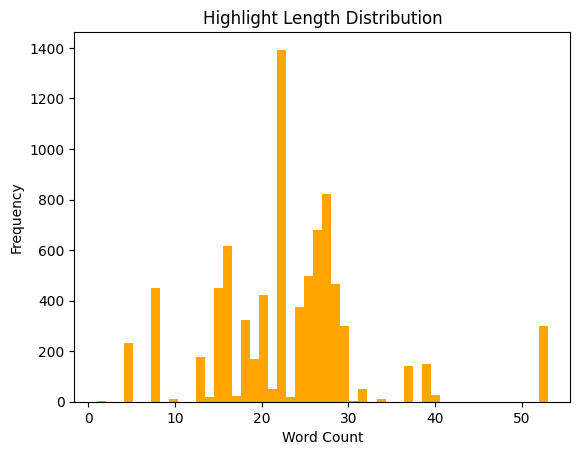

In [9]:
# Histogram of highlight (summary) lengths
plt.hist(df['highlight_len'], bins=50, color='orange')
plt.title('Highlight Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Drop missing rows and keep short articles
df.dropna(inplace=True)
df = df[df['article_len'] < 400]
df = df[df['highlight_len'] < 100]

# Final check
df[['article', 'highlights']].head()

,article,highlights
0,Beyoncé showcases her incredible figure in plu...,Beyoncé has shown off her flawless beauty in a...
1,Radio 1 listeners in shock as sex noises are p...,BBC Radio 1 listeners were left choking on the...
2,"TOWIE's Dan Edgar, 33, and Ella Rae Wise, 23, ...",Dan Edgar and Ella Rae Wise put on a loved-up ...
3,Bradley Cooper recalls 'crazy' pitch meeting a...,Bradley Cooper discussed the 'crazy' experienc...
4,Margaret Qualley and Beanie Feldstein stun in ...,Margaret Qualley and Beanie Feldstein were dre...


In [11]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# Load model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Pick one example
sample_text = "summarize: " + df['article'].iloc[0]

# Tokenize
inputs = tokenizer.encode(sample_text, return_tensors='pt', max_length=512, truncation=True)

# Generate summary
summary_ids = model.generate(inputs, max_length=100, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Original Article:\n", df['article'].iloc[0][:500], "...\n")
print("Generated Summary:\n", summary)
print("Actual Highlight:\n", df['highlights'].iloc[0])

2025-10-03 13:44:33.192281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759499073.452206      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759499073.527605      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Original Article:
 Beyoncé showcases her incredible figure in plunging white dress with thigh-high leg slit as she promotes her new haircare brand CécredBeyoncé has shown off her flawless beauty in a new photo to promote her brand new haircare range. ...

Generated Summary:
 beyoncé showcases her incredible figure in plunging white dress with thigh-high leg slit as she promotes her new haircare brand.
Actual Highlight:
 Beyoncé has shown off her flawless beauty in a new photo to promote her brand new haircare range.


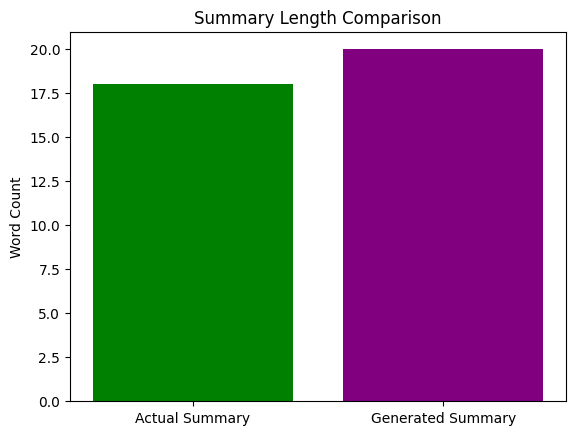

In [12]:
# Bar chart comparing summary lengths
labels = ['Actual Summary', 'Generated Summary']
values = [len(df['highlights'].iloc[0].split()), len(summary.split())]

plt.bar(labels, values, color=['green', 'purple'])
plt.title('Summary Length Comparison')
plt.ylabel('Word Count')
plt.show()